In [2]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [3]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
perfomances_dt5['L_pct'] = 1-(perfomances_dt5['L']/baselevel_n)
baselevel_p = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt5['P_dlt'] = perfomances_dt5['P']-baselevel_p
perfomances_dt5['C'] = - perfomances_dt5['P_dlt'] - perfomances_dt5['G']
perfomances_dt5

,policy,NMS,tech,Y_corn,L1,L2,L,leach_ext,N_fert,P,G,corn_avg_ha,policy_val,policy_name,E,W,L_pct,P_dlt,C
0,ratio_2,1,UR,11853.643231,38.496208,28.387400,66.883608,103.218994,206.560150,2741.457661,-115.673684,4.355603e+06,2.00,ratio,496.008837,2129.775140,-0.186787,96.244868,19.428816
1,ratio_4,1,UR,11785.446116,33.496285,25.186751,58.683036,91.086384,176.134833,2691.092431,-49.317753,4.355603e+06,4.00,ratio,435.193394,2206.581284,-0.041276,45.879639,3.438115
2,ratio_6,1,UR,11750.374852,32.068898,24.287963,56.356861,87.526379,166.134833,2645.212793,0.000000,4.355603e+06,6.00,ratio,417.942482,2227.270311,0.000000,0.000000,-0.000000
3,ratio_8,1,UR,11674.104729,30.337327,23.174948,53.512276,83.028784,152.269667,2603.290884,42.635507,4.355603e+06,8.00,ratio,396.847037,2249.079354,0.050475,-41.921908,-0.713599
4,ratio_10,1,UR,11570.949987,28.460169,21.999893,50.460062,78.157091,136.134833,2568.633163,76.235507,4.355603e+06,10.00,ratio,374.211817,2270.656854,0.104633,-76.579629,0.344122
5,ratio_12,1,UR,11504.328754,27.803914,21.548176,49.352091,76.321973,128.829817,2533.277285,108.217046,4.355603e+06,12.00,ratio,365.995104,2275.499227,0.124293,-111.935508,3.718462
6,ratio_14,1,UR,11400.545164,26.926505,20.966366,47.892871,73.924355,118.829817,2502.154836,133.089395,4.355603e+06,14.00,ratio,355.173535,2280.070696,0.150186,-143.057957,9.968562
7,ratio_16,1,UR,11277.841871,26.163536,20.448137,46.611673,71.845954,108.829817,2473.970715,152.361743,4.355603e+06,16.00,ratio,345.672166,2280.660293,0.172919,-171.242077,18.880334
8,ratio_18,1,UR,11135.197100,25.516455,19.988579,45.505035,70.148264,98.829817,2448.558862,166.034092,4.355603e+06,18.00,ratio,337.465338,2277.127617,0.192556,-196.653930,30.619838
9,ratio_20,1,UR,11086.338572,25.321977,19.849676,45.171653,69.616961,95.389966,2423.655325,186.964334,4.355603e+06,20.00,ratio,334.992980,2275.626679,0.198471,-221.557467,34.593133


In [6]:
perfomances_dt5 = perfomances_dt5[perfomances_dt5['L_pct'] >= 0]
perfomances_dt5 = perfomances_dt5.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '1')]
fee_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '1')]
nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '1')]
ratio_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '2')]
fee_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '2')]
nred_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '2')]

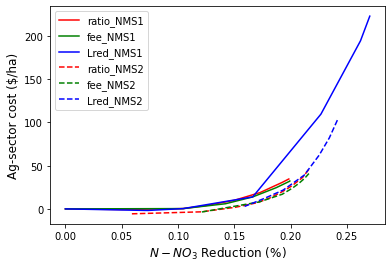

In [9]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_pct'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
ax.plot(fee_1_dt['L_pct'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
ax.plot(nred_1_dt['L_pct'], nred_1_dt['C'], color = 'b', label = 'Lred_NMS1')
ax.plot(ratio_2_dt['L_pct'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_NMS2')
ax.plot(fee_2_dt['L_pct'], fee_2_dt['C'], linestyle='dashed', color = 'g', label = 'fee_NMS2')
ax.plot(nred_2_dt['L_pct'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'Lred_NMS2')

plt.legend()
plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Ag-sector cost ($/ha)", size = 12)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/relative_efficiency.png"
plt.savefig(plot_file_name, dpi=300)